Network **capacity** is simply the number of tunable  parameters (weight and bias parameters)

Network **capacity** is simply the number of tunable  parameters the total number of weight and bias parameters

A low capacity model will likely underfit training data

A high capacity model risks learning a perfect mapping from training sample to label that would consequently fail to generalise

A low capacity model will likely underfit training data and a high capacity model risks learning a perfect mapping from training sample to label that would consequently fail to generalise. This is because unseen data is unlikely to have exactly the same idiosyncratic form as the training set.  

The goal is a model with *sufficient but limited* capacity 

Such a model will be forced to learn compressed representations - the kind with predictive power 

The goal is a model with sufficient but limited capacity. Such a model will be forced to learn compressed representations - the kind with predictive power.  

The ideal number of layers and number of units in each layer is unknowable in advance

Experiment with a low capacity model and increase capacity until improvement gain flattens out  

The ideal number of layers and number of units in each layer is unknowable in advance. A sensible working principle is therefore to begin with a small model, gradually increasing capacity until improvement gain flattens out. 

Let's compare a small and a large network to the original IMDB network

Let's compare a small and a large network to the original IMDB network

In [1]:
from tensorflow.keras import layers, models
def build_model(layer_1_units, layer_2_units, layer_3_units):
    model = models.Sequential()
    model.add(layers.Dense(layer_1_units, activation = 'relu', input_shape = (10000,)))
    model.add(layers.Dense(layer_2_units, activation = 'relu'))
    model.add(layers.Dense(layer_3_units, activation = 'sigmoid'))
    model.compile(optimizer = 'rmsprop',
                  loss = 'binary_crossentropy',
                  metrics = ['acc'])
    return model

A three layer model building function. Two relu layers followed by a sigmoid layer for the output of a probability.

In [2]:
build_model(16, 16, 1).summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


The original network. 160,305 trainable parameters.

In [3]:
build_model(4, 4, 1).summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 4)                 40004     
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 40,029
Trainable params: 40,029
Non-trainable params: 0
_________________________________________________________________


A small (low capacity) network with about one quarter the capacity of the original network.

In [4]:
build_model(512, 512, 1).summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               5120512   
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 513       
Total params: 5,383,681
Trainable params: 5,383,681
Non-trainable params: 0
_________________________________________________________________


A large (high capacity) network - 32 times original capacity.

In [5]:
from tensorflow.keras.datasets import imdb

((train_data, train_labels), (test_data, test_labels)) = imdb.load_data(num_words = 10000)

import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros( (len(sequences), dimension) )
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

Download and vectorise data.

In [6]:
import tensorflow as tf
class CustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        c = ['\b|', '\b/', '\b-', '\b\\'] 
        print(c[epoch % 4], end='')
    def on_epoch_end(self, epoch, logs=None):
        print('\b', end='')

You can ask TensorFlow to do things during training. Technically, a 'callback'. Here is code for a spinner - just so that we have something to watch during training.

In [7]:
histories = {}
for i in [4, 16, 512]:
    model = build_model(i, i, 1)
    model_name = str(i) + '-' + str(i) + '-' + str(1)
    print('Training', model_name)
    history = model.fit(partial_x_train, 
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data = (x_val, y_val),
                     verbose=0,
                     callbacks=[CustomCallback()])
    histories[model_name] = history

Training 4-4-1
Training 16-16-1
Training 512-512-1


Loop for building and training three networks. The networks are named according to the number of units in each layer and the histories are saved in a dictionary. The progress spinner rotates slowly on the large network because there are many more parameters to train in each epoch. 

In [8]:
import matplotlib.pyplot as plt
    
def plot_loss_comparison(loss_a, label_a, loss_b, label_b, y_label):

    epochs = range(1, len(loss_a) + 1)

    plt.plot(epochs, loss_a, 'b+', label = label_a)
    plt.plot(epochs, loss_b, 'bo', label = label_b)
    plt.xlabel('Epochs')
    plt.ylabel(y_label)
    plt.legend()
    #plt.savefig('overfitting.eps', format = 'eps')
    plt.show()

A plot function for comparing two losses.

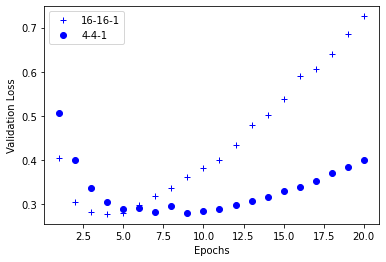

In [9]:
net_a, net_b = '16-16-1', '4-4-1'
plot_loss_comparison(loss_a=histories[net_a].history['val_loss'], label_a=net_a, 
                     loss_b=histories[net_b].history['val_loss'], label_b=net_b, 
                     y_label='Validation Loss')

The low capacity starts overfitting later and at a slower rate than the original network

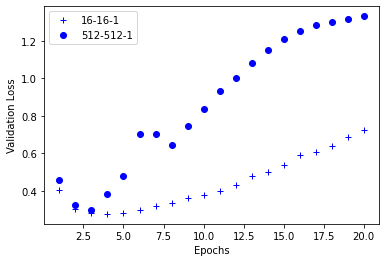

In [10]:
net_a, net_b = '16-16-1', '512-512-1'
plot_loss_comparison(loss_a=histories[net_a].history['val_loss'], label_a=net_a, 
                     loss_b=histories[net_b].history['val_loss'], label_b=net_b, 
                     y_label='Validation Loss')

The high capacity network overfits almost at the outset, and more vigorously

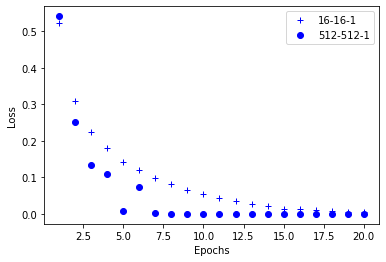

In [11]:
net_a, net_b = '16-16-1', '512-512-1'
plot_loss_comparison(loss_a=histories[net_a].history['loss'], label_a=net_a, 
                     loss_b=histories[net_b].history['loss'], label_b=net_b, 
                     y_label='Loss')

The high capacity network zeros training loss earlier than the original network. The high capacity network easily models training data - at the expense of overfitting.